# Morphological Operations

*Morphology* refers to shape or structure. In image processing, classical morphological operations are treatments done on binary images, in particular, aggregates of 1’s or 0’s, that form shapes. Morphological operations act on these shapes to improve them for further processing or to extract information from the. All morphological operations affect the shape of the image in some way, for example, the shapes may be expanded, thinned, internal holes could be closed, disconnected blobs can be joined.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
from matplotlib.patches import Rectangle
from scipy.ndimage import binary_dilation, binary_erosion, binary_closing, binary_opening

plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.1
# plt.rcParams["text.usetex"] = True

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Template elements

In [2]:
# 5 by 5 square
square_5 = np.zeros((11, 11))
square_5[3:8, 3:8] = 1

In [3]:
# 10 by 10 hollow square - 2 boxes thick
hollow_square = np.zeros((20, 20))
hollow_square[5:15, 5:15] = 1
hollow_square[7:13, 7:13] = 0

In [4]:
# plus sign - 1 box thick
plus_sign = np.zeros((11, 11))
plus_sign[3:8, 5] = 1
plus_sign[5, 3:8] = 1

In [5]:
# barbell - 5 by 5 squares
barbell =  np.zeros((20, 20))
barbell[7:12, 3:8] = 1
barbell[7:12, 11:16] = 1
barbell[9, 8:11] = 1

## Structuring elements

In [6]:
# 2 by 2 square
square_2 = np.zeros((10, 10))
square_2[4:6, 4:6] = 1

In [7]:
# 2 by 1 rectangle
rectangle = np.zeros((10, 10))
rectangle[5, 4:6] = 1

In [8]:
# 5 by 5 square
square_5s = np.zeros((11, 11))
square_5s[3:8, 3:8] = 1

## Dilation and erosion
Morphology is a broad set of image processing operations that process images based on shapes. In a morphological operation, each pixel in the image is adjusted based on the value of other pixels in its neighborhood. By choosing the size and shape of the neighborhood, you can construct a **morphological operation** that is sensitive to specific shapes in the input image.

In [9]:
def morphological_op(template, strel):
    dilation = binary_dilation(template, structure = strel)
    erosion = binary_erosion(template, structure = strel)
    return dilation, erosion

In [10]:
def morphological_op_plot(template):
    structures = [square_2, rectangle, square_5s]
    fig, ax = plt.subplots(len(structures), 4, figsize = (12, 9), tight_layout = True)
    
    for i, strel in enumerate(structures):
        ax[i,0].imshow(template, cmap = "gray")
        ax[i,1].imshow(strel, cmap = "gray")
        ax[i,2].imshow(morphological_op(template, strel)[0], cmap = "gray")
        ax[i,3].imshow(morphological_op(template, strel)[1], cmap = "gray")

    ax[0,0].set_title("Original element")
    ax[0,1].set_title("Structuring element")
    ax[0,2].set_title("Dilation")
    ax[0,3].set_title("Erosion")

    ax = ax.flatten()
    for a in ax:
        a.axis("off")

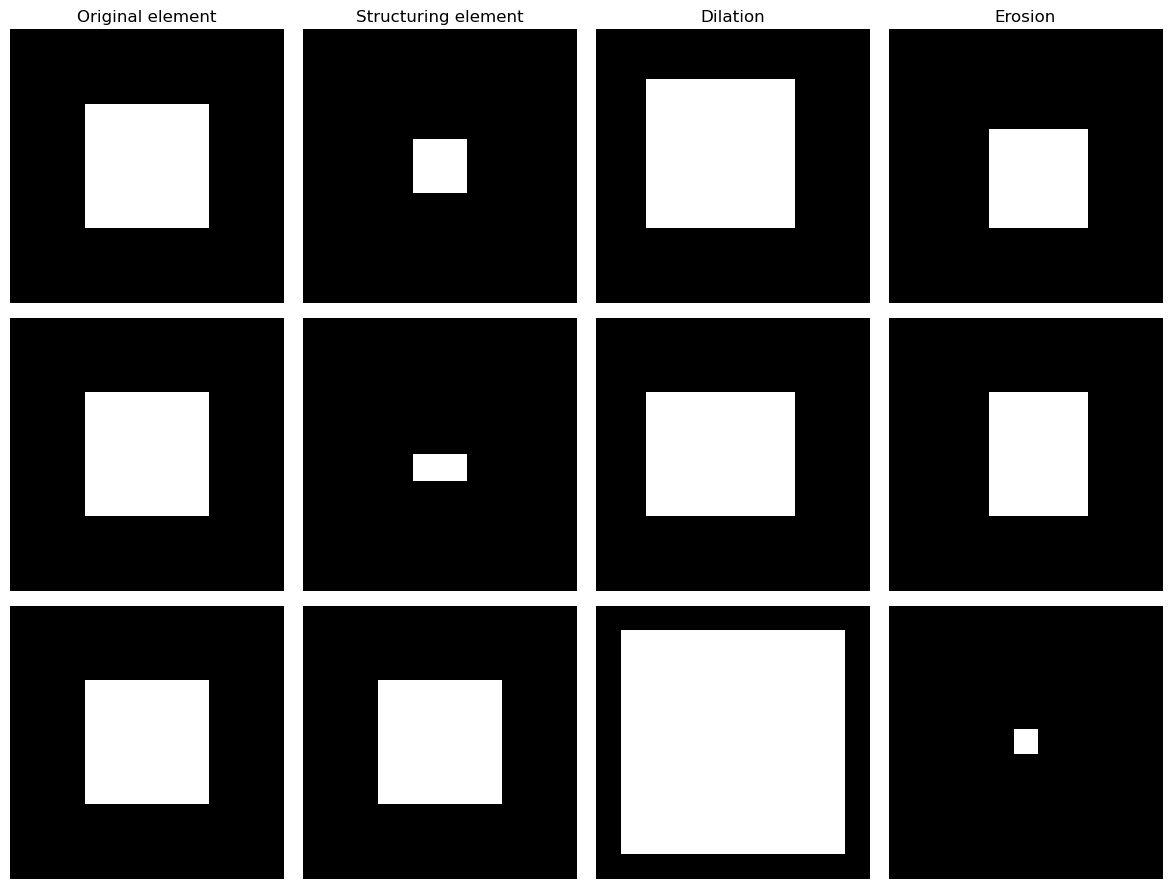

In [11]:
morphological_op_plot(square_5)
plt.savefig("five by five square morph.png")

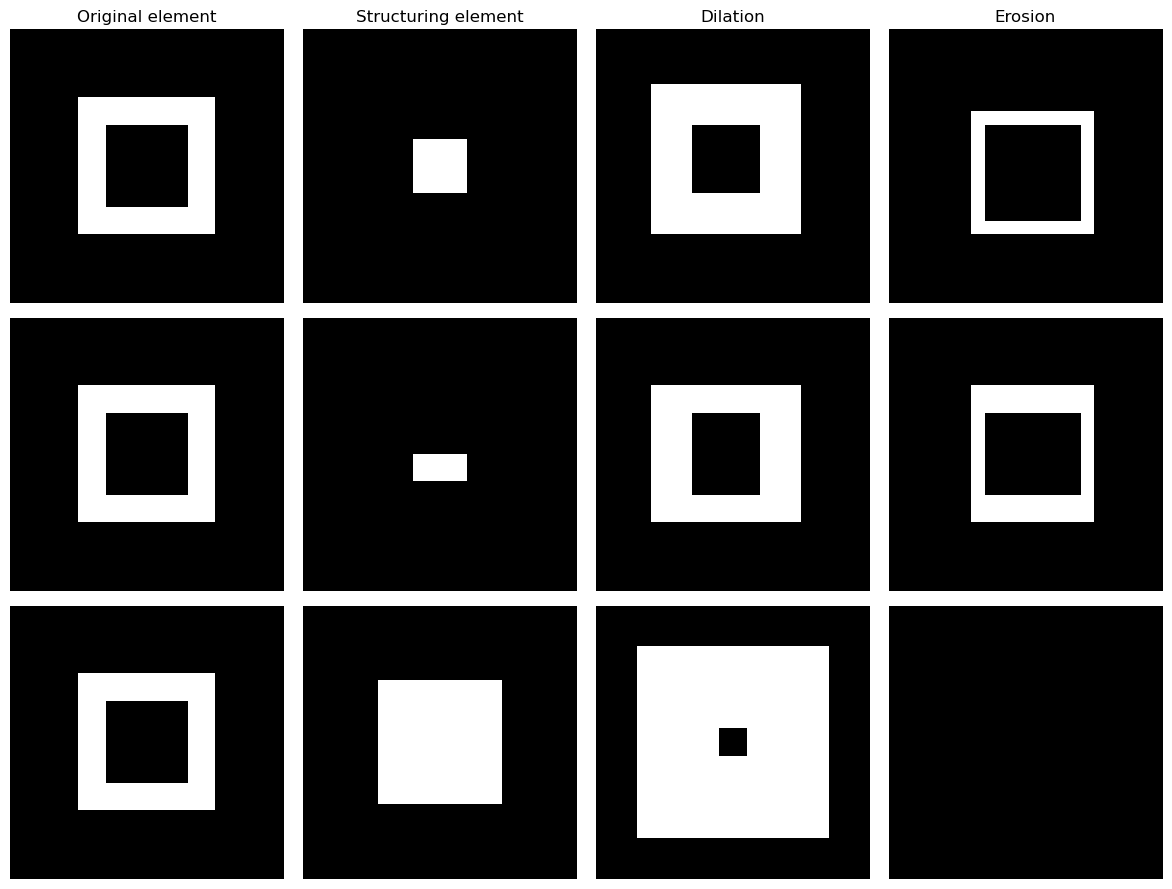

In [12]:
morphological_op_plot(hollow_square)
plt.savefig("hollow square morph.png")

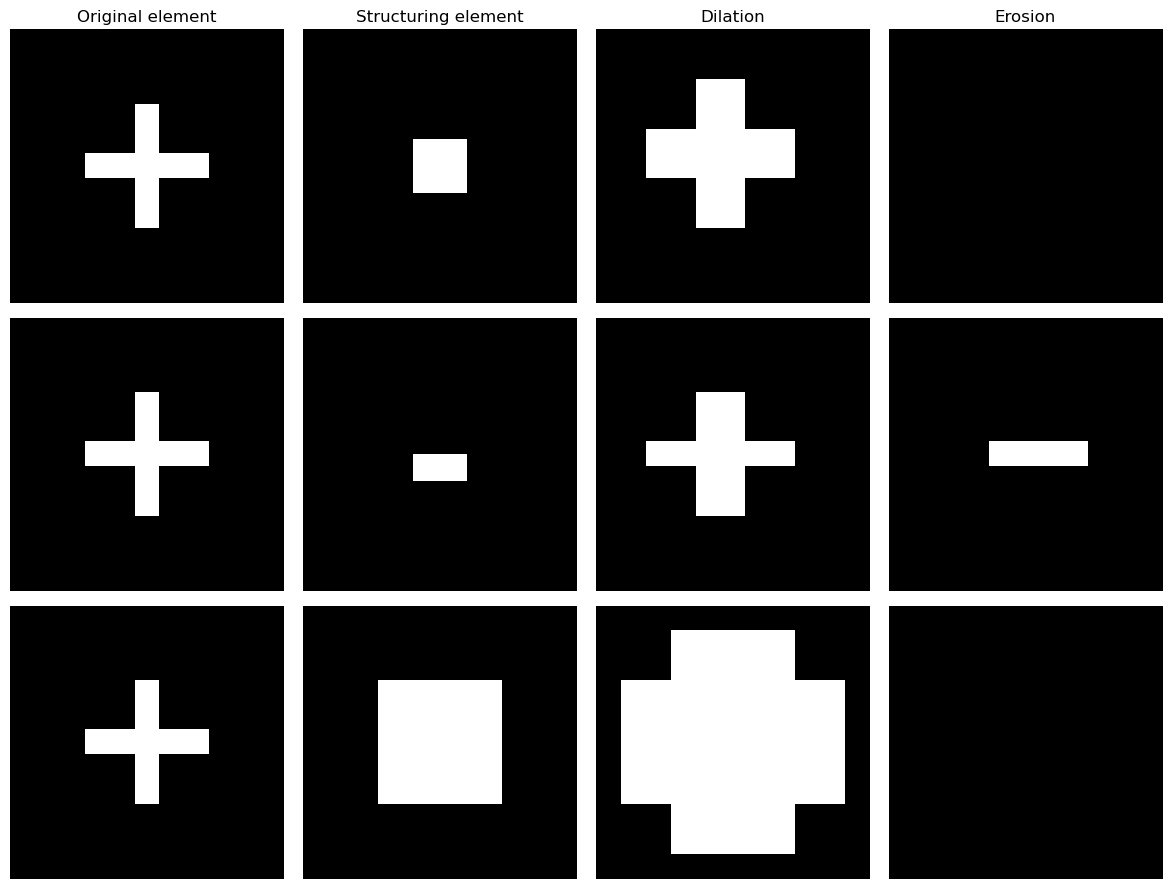

In [13]:
morphological_op_plot(plus_sign)
plt.savefig("plus sign morph.png")

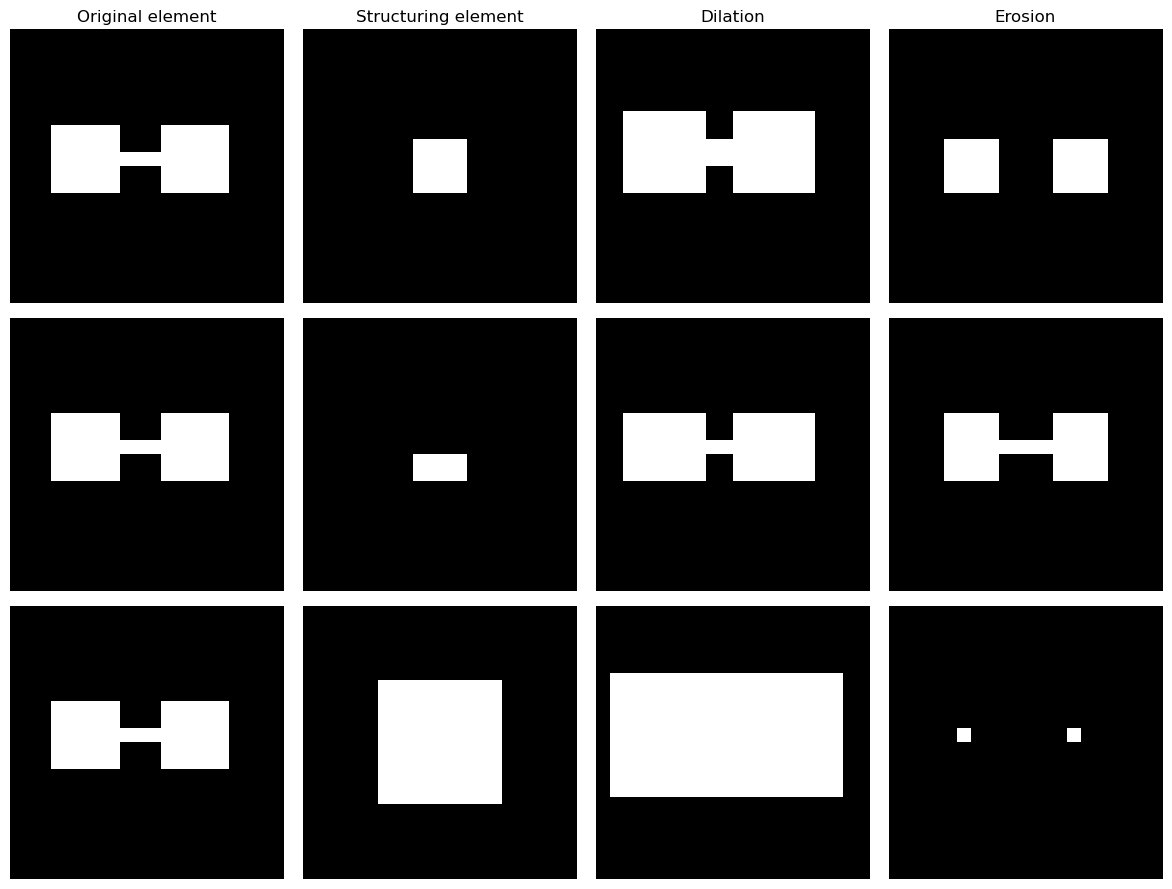

In [14]:
morphological_op_plot(barbell)
plt.savefig("dumbell morph.png")

## Malaria
Morphological operations are ideal for cleaning up binary images in preparation for feature extraction. After
segmentation, it may happen that apart from the regions of interest, there may be several pixels that light up
because they satisfy your thresholding conditions.

In [15]:
def rgb2gray(filename):
    rgbimg = Image.open(filename + ".png")
    grayimg = np.array(rgbimg.convert("L"))
    return grayimg

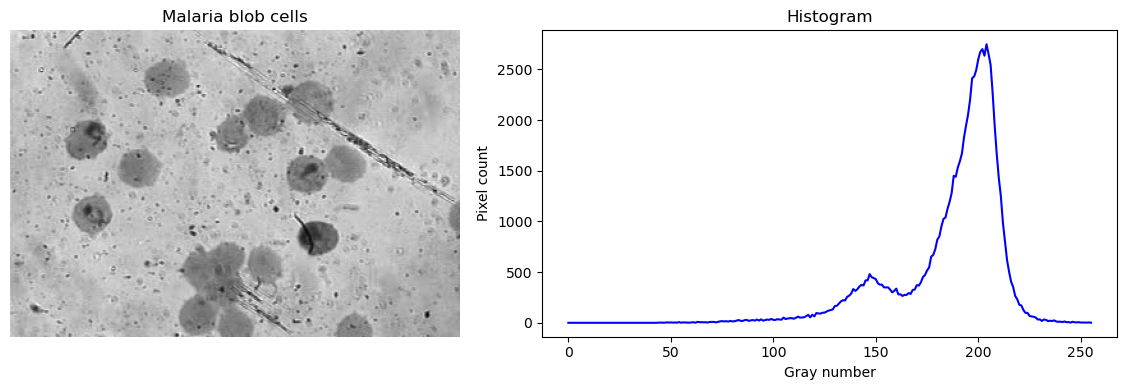

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), tight_layout = True)
malaria_hist, malaria_edge = np.histogram(rgb2gray("malaria").flatten(), 256, [0, 255])
ax[0].imshow(rgb2gray("malaria"), cmap = "gray")
ax[0].set_title("Malaria blob cells")
ax[0].axis("off")
ax[1].plot(malaria_hist, color = "blue")
ax[1].set_xlabel("Gray number")
ax[1].set_ylabel("Pixel count")
ax[1].set_title("Histogram")

fig.savefig("malaria histogram.png")

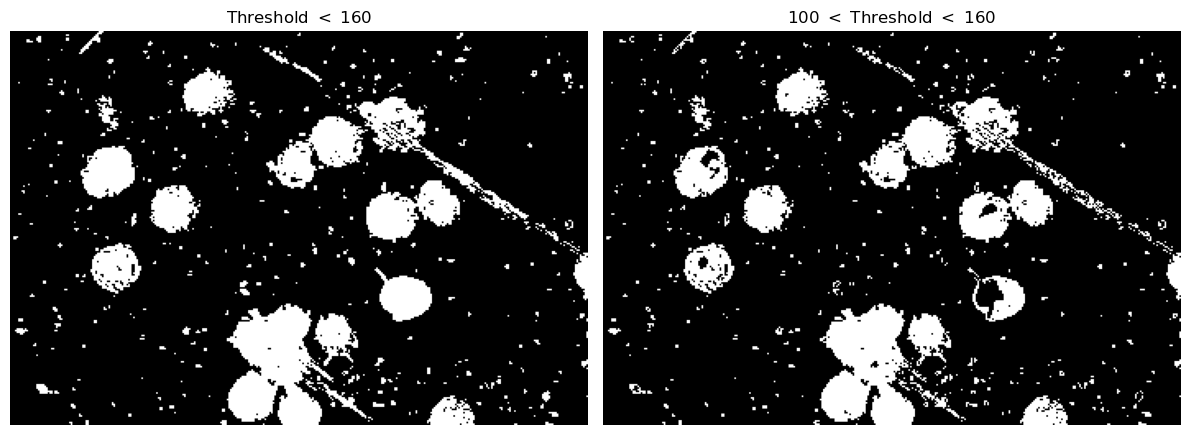

In [17]:
thresholded_img1 = rgb2gray("malaria") < 160
thresholded_img2 = (rgb2gray("malaria") > 100) & (rgb2gray("malaria") < 160)

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].imshow(thresholded_img1, cmap = "gray")
ax[0].set_title(r"Threshold $<$ 160")
ax[1].imshow(thresholded_img2, cmap = "gray")
ax[1].set_title(r"100 $<$ Threshold $<$ 160")

for a in ax:
    a.axis("off")
    
fig.savefig("malaria diff thresholds.png")

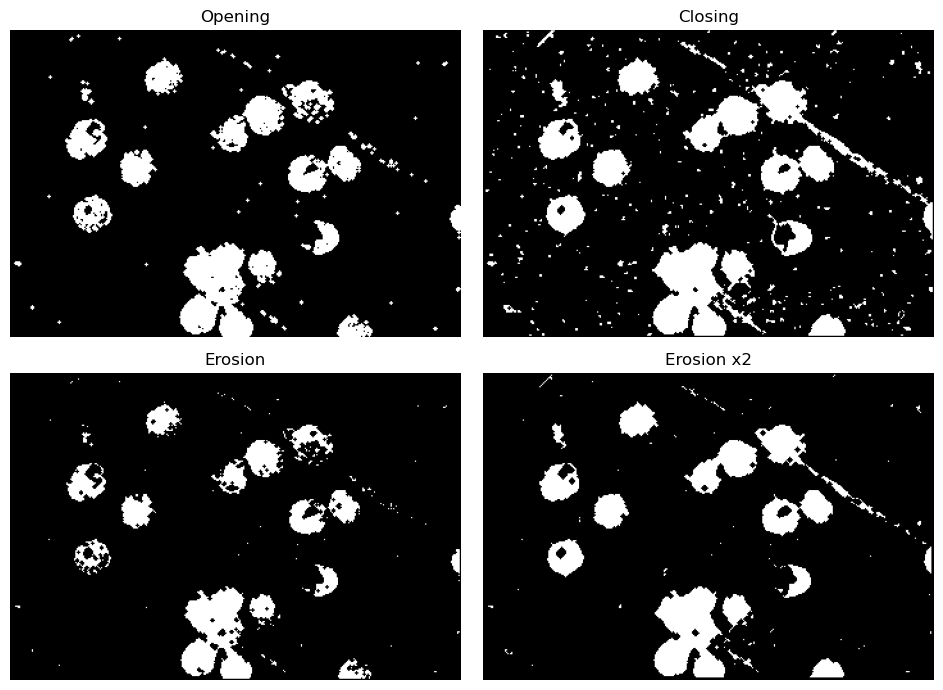

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (10, 7), tight_layout = True)
titles = ["Opening", "Closing", "Erosion", "Erosion x2"]
ax = ax.flatten()

ax[0].imshow(binary_opening(thresholded_img2), cmap = "gray")
ax[1].imshow(binary_closing(thresholded_img2), cmap = "gray")
ax[2].imshow(binary_erosion(thresholded_img2), cmap = "gray")
ax[3].imshow(binary_erosion(binary_closing(thresholded_img2)), cmap = "gray")

for i, title in enumerate(titles):
    ax[i].set_title("{}".format(title))
    ax[i].axis("off")
    
fig.savefig("malaria diff morph operation.png")